# __Descomposicion de Valores Singulares (SVD)__

Es un metodo que surge de realizar la descomposicion de una matriz. Esta intimamente relacionado con el hecho de diagonalizar una matriz simetrica.

Su objetivo es lograr, a partir de la descomposicion de matrices, obtener la mejor aproximacion de la matriz de datos inicial almacenando la menor cantidad de datos posibles.

Ejemplo, si contamos con un set de datos de 50 features, lo que se busca es con menos cantidad de features representar lo mejor posible la variabilidad de los datos.

## Como se calcula

Supongamos que la matriz de datos original a la que vamos aplicar _SVD_ es $M$. Vamos a aprender como hacer la descomposicion de la matriz mediante la siguiente visualizacion:

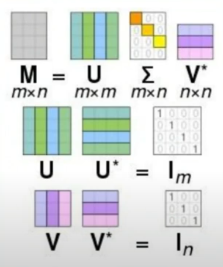

- Las columnas de la matriz $U$ son los autovectores de $M$ por $M$ traspuesto.

- Sigma ($\Sigma$) es la matiz mas importante. Es una matriz diagonal y sus valores son llamados valores singulares. Estos valores se calculan como la raiz cuadrada de los autovalores de $M$ traspuesto por $M$, ordenados decrecientemente.

- Las columnas de $V$ son los autovectores de $M$ traspuesto por $M$

## Obtener SVD de forma practica

In [1]:
# librerias
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd # metodo svd

Para el siguiente ejercicio hay que tener en cuenta los conceptos de _varianza_ y _bias_.

- La varianza mide que tan dispersos estan los datos
- El bias mide que tan acertados han sido los datos.

Vamos a crear una funcion que nos permita visualizar paso a paso la descomposicion SVD de una matriz _A_ que representa una imagen, mostrando su reconstruccion progresiva usando los autovalores.

In [2]:
vmin = 0
vmax = 1
image_bias = 1

def plot_svd(A):

    # longitud de A
    n=len(A)
    plt.imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    print('Imagen formada con la matriz de datos')
    plt.show()

    U, S, V = svd(A)
    print('Matriz U: \n \n', U,'\n \n')
    print('Matriz Sigma: \n \n', S,'\n \n')
    print('Matriz V: \n \n', V,'\n \n')

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=60)
    plt.show()

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U, S, V



La matriz que vamos a utilizar, corresponde a la visualizacion de un corazon.

In [3]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0]
              ])

Pasamos la matriz _D_ a la funcion creada

Imagen formada con la matriz de datos


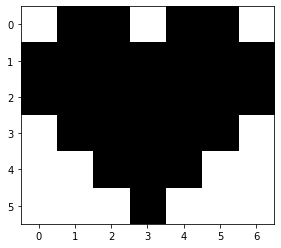

Matriz U: 
 
 [[ 3.61249460e-01 -4.38468638e-16  7.30296743e-01 -5.32180543e-02
  -2.63150853e-01  5.13891975e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
   6.29386561e-01  3.22292657e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
  -6.29386561e-01 -3.22292657e-01]
 [ 4.45394592e-01 -3.53553391e-01  2.73861279e-01  5.17967494e-01
   2.63150853e-01 -5.13891975e-01]
 [ 2.77104327e-01 -7.07106781e-01 -1.82574186e-01 -6.24403602e-01
   2.49800181e-16  1.62196645e-16]
 [ 8.41451321e-02 -3.53553391e-01 -4.56435465e-01  5.71185548e-01
  -2.63150853e-01  5.13891975e-01]] 
 

Matriz Sigma: 
 
 [4.73981604e+00 1.41421356e+00 1.41421356e+00 7.30851490e-01
 1.49190666e-16 1.82188799e-17] 
 

Matriz V: 
 
 [[ 2.28647772e-01  3.98832447e-01  4.57295545e-01  3.98832447e-01
   4.57295545e-01  3.98832447e-01  2.28647772e-01]
 [ 5.00000000e-01  2.50000000e-01 -2.50000000e-01 -5.00000000e-01
  -2.50000000e-01  2.50000000e-01  5.00000000e-01]
 [-3.8729833

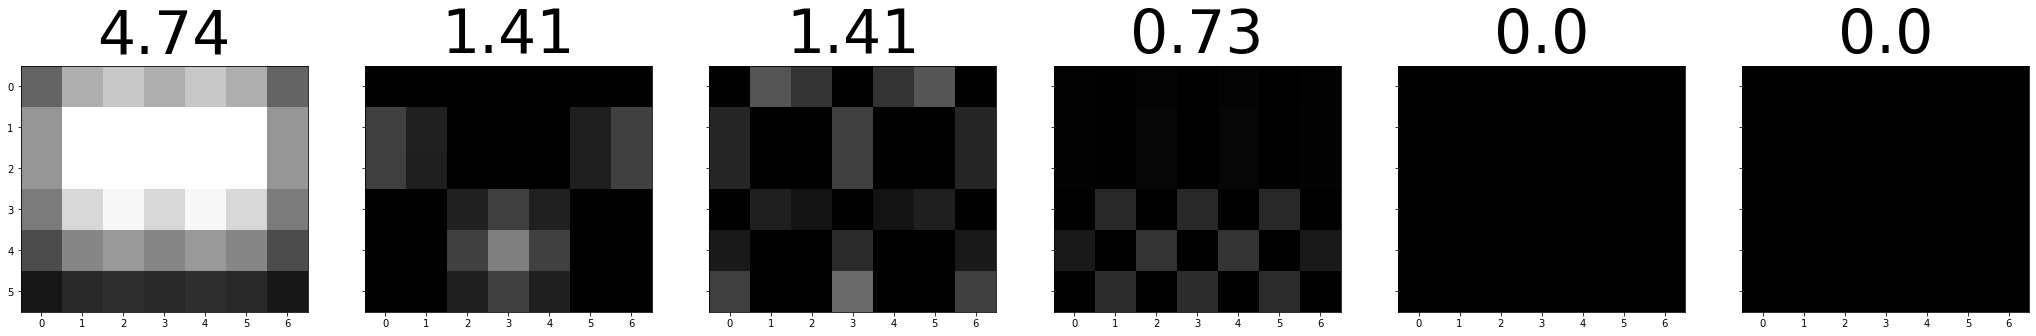

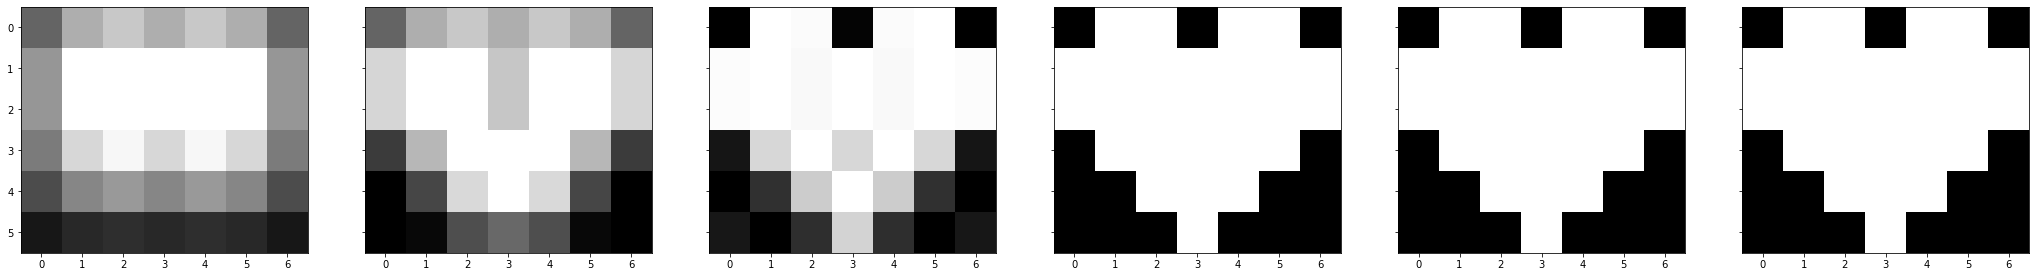

In [4]:
U, S, V = plot_svd(D)

> La primera imagen muestra la matriz _A_ graficada, donde podemos verificar que se trata de un corazon.

> La matriz sigma solo nos devuelve un vector con los autovalores. No nos devuelve la matriz diagonal con los demas elementos ceros.

> Al final se muestra la reconstruccion progresiva de la imagen usando los diferentes autovalores. La primera fila muestra la informacion que capta cada autovalor. La segunda fila muestra la informacion acumulada hasta dicho autovalor. 

> Los autovalores nos indican cual es la informacion que me aporta quedarme con ese autovalor y los autovectores asociados

> El primer autovalor (4.74) y sus respectivos autovectores, recogen una gran cantidad de informacion de la matriz original aunque poco definida.

> El segundo autovalor (1.41) individualmente, capta menos informacion que el primero, pero si nos quedamos con los dos primeros autovalores, lo que implica pasar de 6 dimensiones a 2, obtenemos una mayor cantidad de informacion de la matriz original y ya podemos inferir que se trata de un corazon

> Si tomamos los tres primeros autovalores, lo que implica pasar de 6 a 3 dimensiones, la informacion capturada muestra claramente que se trata de un corazon aunque no se ve del todo definido.

> Si tomamos los 4 primeros autovalores, ya vemos definidamente que se trata de un corazon. Puede que se pierda alguna informacion pero no es relevante en cuanto a la figura del corazon. 

> En definitiva, la funcion SVD nos muestra que podemos seleccionar una cantidad de dimensiones menor a las dimensiones de los datos y final obtener una aproximacion bastante buena a los datos originales


## Tabajando sobre una imagen en blanco y negro

Vamos a utilizar __SVD__ para realizar una compresion de imagen y mostrar como se pierde informacion a medida que se reducen las dimensiones.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage.io import imread
from numpy.linalg import svd
from matplotlib.pyplot import imshow

from PIL import Image

In [ ]:
# leer imagen
img = imread('edificio_px.jpg')
img.shape

(188, 336, 3)

> La imagen tiene 188 x 336 pixeles

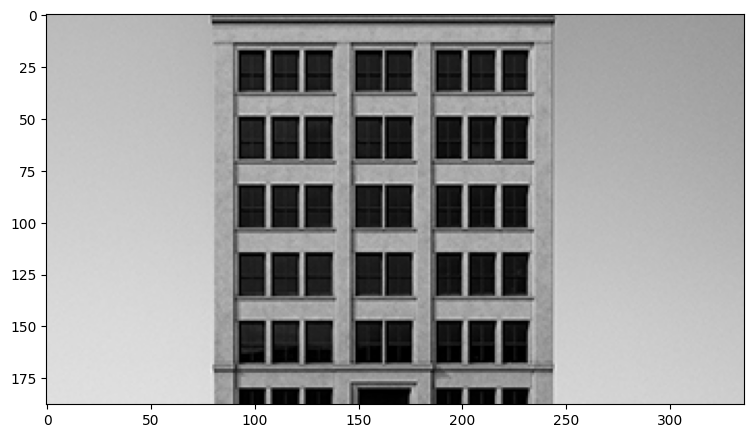

In [ ]:
# abrir imagen con PIL
img = Image.open('edificio_px.jpg')

# convertir imagen en escala de grises
# L: luminancia
# A: canal alfa (transparencia)
imggray = img.convert('LA')

# definir dimensiones de la imagen
x, y = (188, 336)
# crear lienzo
plt.figure(figsize=(9,6))
# mostrar imagen en escala de grises
plt.imshow(imggray)
plt.show()

Vamos a llevar la imagen a una representacion matricial con Numpy

In [4]:
imgmat =np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

imgmat

matrix([[186., 186., 185., ..., 154., 152., 151.],
        [186., 187., 186., ..., 153., 151., 155.],
        [188., 187., 188., ..., 153., 154., 155.],
        ...,
        [222., 224., 225., ..., 207., 204., 205.],
        [222., 221., 224., ..., 206., 203., 205.],
        [223., 221., 223., ..., 205., 205., 206.]], shape=(188, 336))

Para verificar que la matriz 'imgmat' tiene la informacion de la imagen, vamos a graficar los datos de la matriz